<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-February/blob/main/Linear%20Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/purna135/ML-Datasets/main/weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.drop(["Gender"], inplace = True, axis = 1)

In [5]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


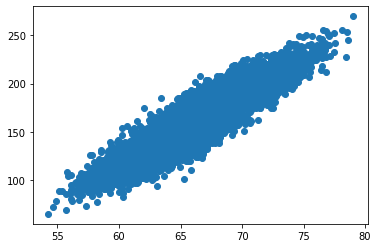

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df["Height"], df["Weight"])

In [17]:
# As the dataset is large so we are taking some points
X = df["Height"][:200]
Y = df["Weight"][:200]

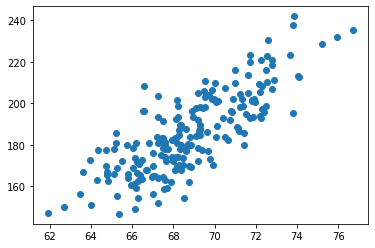

In [18]:
plt.scatter(X, Y)

In [19]:
X.shape

(200,)

In [20]:
X = X.values.reshape(-1, 1) # to train model we need a 2D array, so we are reshaping it to 2D (200 rows, 1 cols)

In [21]:
X.shape

(200, 1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 50)

In [23]:
X_train.shape

(140, 1)

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
lr.predict(X_test)

array([202.42772225, 163.93751992, 161.84842036, 178.62966295,
       189.75711108, 180.52660301, 199.75220299, 175.21094339,
       159.10700302, 182.48066941, 182.49316698, 228.15698598,
       186.34977612, 159.28176073, 181.88492559, 189.40368422,
       165.31318567, 223.77628971, 181.60129903, 164.53114187,
       206.63788901, 215.59105305, 180.39696616, 169.55293439,
       183.37603486, 191.72272546, 170.67108965, 190.3864735 ,
       174.10716933, 179.26089108, 149.63243912, 145.06678513,
       200.32720334, 197.90147501, 182.87869438, 207.98137756,
       175.0800427 , 175.04481456, 198.28462606, 178.52220574,
       183.8890044 , 172.67921416, 168.02354226, 192.52954079,
       180.87828719, 232.69717995, 182.4894624 , 168.01721067,
       188.64168375, 185.30866665, 185.66877162, 190.14926888,
       193.20402122, 170.72558983, 166.38263697, 188.02942834,
       162.09929792, 188.04333922, 190.23700354, 207.23993561])

In [26]:
y_pred = lr.predict(X_test)

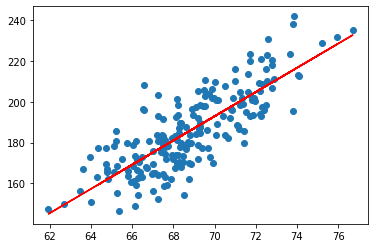

In [27]:
plt.scatter(X, Y)
plt.plot(X_test, y_pred, color = "r")

In [28]:
# Slope of the line (m)
lr.coef_

array([5.93199026])

In [29]:
# Y intercept of line
lr.intercept_

-222.34481302666856

In [30]:
m = lr.coef_
c = lr.intercept_

In [31]:
# take a sample point
x = X_test[0][0]
x

71.6070857988906

In [46]:
# Equation of line Y = M*X + C 
y = m * x + c

In [33]:
y

array([202.42772225])

In [34]:
lr.predict(x.reshape(-1,1))

array([202.42772225])

# Custom Linear Regression

In [36]:
class CustomRL():
  def __init__(self):
    self.m = None
    self.c = None

  def fit(self, x, y):
    p = 0
    q = 0
    for i in range(x.shape[0]):
      p = p + (y[i] - y.mean()) * (x[i] - x.mean())
      q = q + (x[i] - x.mean()) ** 2
    
    self.m = p/q
    self.c = y.mean() - self.m * x.mean()
  
  def predict(self, x_test):
    return self.m * x_test + self.c

In [37]:
clr = CustomRL()

In [38]:
clr.fit(X_train, y_train.values)

In [ ]:
clr.predict(X_test)

In [40]:
y_custom = clr.predict(X_test)

In [41]:
y_sklealn = lr.predict(X_test)

In [42]:
y_sklealn

array([202.42772225, 163.93751992, 161.84842036, 178.62966295,
       189.75711108, 180.52660301, 199.75220299, 175.21094339,
       159.10700302, 182.48066941, 182.49316698, 228.15698598,
       186.34977612, 159.28176073, 181.88492559, 189.40368422,
       165.31318567, 223.77628971, 181.60129903, 164.53114187,
       206.63788901, 215.59105305, 180.39696616, 169.55293439,
       183.37603486, 191.72272546, 170.67108965, 190.3864735 ,
       174.10716933, 179.26089108, 149.63243912, 145.06678513,
       200.32720334, 197.90147501, 182.87869438, 207.98137756,
       175.0800427 , 175.04481456, 198.28462606, 178.52220574,
       183.8890044 , 172.67921416, 168.02354226, 192.52954079,
       180.87828719, 232.69717995, 182.4894624 , 168.01721067,
       188.64168375, 185.30866665, 185.66877162, 190.14926888,
       193.20402122, 170.72558983, 166.38263697, 188.02942834,
       162.09929792, 188.04333922, 190.23700354, 207.23993561])

In [43]:
y_custom

array([[202.42772225],
       [163.93751992],
       [161.84842036],
       [178.62966295],
       [189.75711108],
       [180.52660301],
       [199.75220299],
       [175.21094339],
       [159.10700302],
       [182.48066941],
       [182.49316698],
       [228.15698598],
       [186.34977612],
       [159.28176073],
       [181.88492559],
       [189.40368422],
       [165.31318567],
       [223.77628971],
       [181.60129903],
       [164.53114187],
       [206.63788901],
       [215.59105305],
       [180.39696616],
       [169.55293439],
       [183.37603486],
       [191.72272546],
       [170.67108965],
       [190.3864735 ],
       [174.10716933],
       [179.26089108],
       [149.63243912],
       [145.06678513],
       [200.32720334],
       [197.90147501],
       [182.87869438],
       [207.98137756],
       [175.0800427 ],
       [175.04481456],
       [198.28462606],
       [178.52220574],
       [183.8890044 ],
       [172.67921416],
       [168.02354226],
       [192

In [44]:
# Slope and Intercept for sklean linear regression
print("Slope", lr.coef_)
print("Intercept", lr.intercept_)

Slope [5.93199026]
Intercept -222.34481302666856


In [45]:
# Slope and Intercept for our custom function
print("Slope", clr.m)
print("Intercept", clr.c)

Slope [5.93199026]
Intercept [-222.34481303]
